# CIFAR Conv Net

И так, в этом ноутбуке Вы сделаете превую в своей жизни сверточную сеть! На сложном датасете. Cкачайте его кстати, 

In [2]:
# !mkdir cifar10
# !curl -o cifar-10-python.tar.gz http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
# !tar -xvzf cifar-10-python.tar.gz -C cifar10

mkdir: cannot create directory ‘cifar10’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  162M  100  162M    0     0  2958k      0  0:00:56  0:00:56 --:--:-- 3350k
cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten
import sys
sys.setrecursionlimit(10000)
%matplotlib inline

In [123]:
from cifar import load_CIFAR10
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

cifar10_dir = './cifar10/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
X_train = whiten(X_train)
X_test = whiten(X_test)
for x in X_train:
    x = clip(x)
for x in X_test:
    x = clip(x)

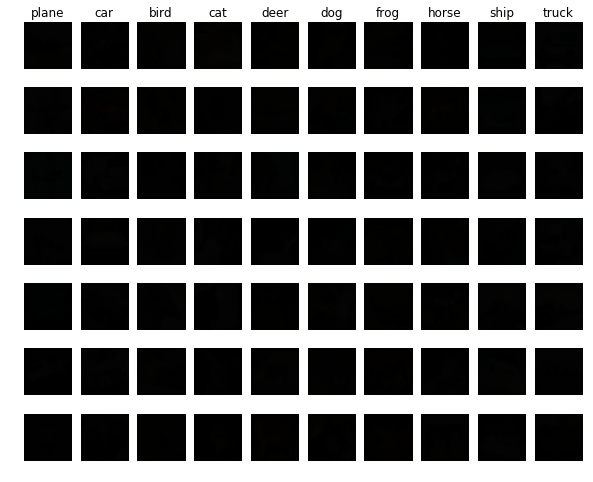

In [3]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8').transpose(1, 2, 0))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

<h1 align="center">First of all -- Checking Questions</h1> 

**Вопрос 1**: Чем отличаются современные сверточные сети от сетей 5 летней давности?

<Ответ>

**Вопрос 2**: Какие неприятности могут возникнуть во время обучения современных нейросетей?

<Ответ>


**Вопрос 3**: У вас есть очень маленький датасет из 100 картинок, классификация, но вы очень хотите использовать нейросеть, какие неприятности вас ждут и как их решить? что делать если первый вариант  решения не заработает?

<Ответ>

**Вопрос 4**: Как сделать стайл трансфер для музыки? oO

<Ответ>

In [3]:
import theano
print(theano.sandbox.cuda.device_properties(0))
print(theano.sandbox.cuda.device_properties(1))
from theano.sandbox.cuda.dnn import dnn_available as d; print(d() or d.msg)
theano.__version__

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29



{'major': 3, 'tccDriver': 0, 'kernelExecTimeoutEnabled': 1, 'deviceOverlap': 1, 'driverVersion': 8000, 'warpSize': 32, 'concurrentKernels': 1, 'maxThreadsPerBlock': 1024, 'computeMode': 0, 'canMapHostMemory': 1, 'maxGridSize2': 65535, 'maxGridSize1': 65535, 'maxGridSize0': 2147483647, 'integrated': 0, 'minor': 7, 'ECCEnabled': 1, 'runtimeVersion': 8000, 'textureAlignment': 512, 'multiProcessorCount': 13, 'clockRate': 823500, 'totalConstMem': 65536, 'name': 'Tesla K80', 'memPitch': 2147483647, 'maxThreadsDim1': 1024, 'maxThreadsDim0': 1024, 'maxThreadsDim2': 64, 'coresCount': -13, 'sharedMemPerBlock': 49152, 'regsPerBlock': 65536}
{'major': 3, 'tccDriver': 0, 'kernelExecTimeoutEnabled': 0, 'deviceOverlap': 1, 'driverVersion': 8000, 'warpSize': 32, 'concurrentKernels': 1, 'maxThreadsPerBlock': 1024, 'computeMode': 0, 'canMapHostMemory': 1, 'maxGridSize2': 65535, 'maxGridSize1': 65535, 'maxGridSize0': 2147483647, 'integrated': 0, 'minor': 7, 'ECCEnabled': 1, 'runtimeVersion': 8000, 'textu

Using gpu device 1: Tesla K80 (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5110)


'0.9.0'

In [6]:
print(theano.sandbox.cuda.dnn.version())

(5110, 5110)


In [4]:
import lasagne
print(lasagne.__version__)
from theano import tensor as T
from lasagne.nonlinearities import *

input_X = T.tensor4("X")
target_y = T.vector("target Y integer",dtype='int64')

0.2.dev1


### Соберите нейронку: 
- Many times x (Conv+Pool)
- Many small convolutions like 3x3
- Batch Norm 
- Residual Connection
- Data Augmentation 
- Learning rate Schedule 
- ...

### Для вдохновения 
- http://torch.ch/blog/2015/07/30/cifar.html
- https://github.com/szagoruyko/wide-residual-networks 

### Самое интересное
- Для сдачи задания нужно набрать на точность тесте > **92.5**% (это займет много времени, торопитесь :) )
- Для получения бонусных баллов > **95.0**%
- Будет очень хорошо если вы придумаете свою архитектуру или сможете обучить что-то из вышеперечисленного :)
- А для обучения всего этого добра вам будет куда удобнее использовать GPU на Amazon 
    - Инструкция https://github.com/persiyanov/ml-mipt/tree/master/amazon-howto 
    - Вам помогут tmux, CuDNN, ssh tunnel, nvidia-smi, ... 
    - Have fun :)

In [5]:
from lasagne import init
from lasagne.layers import InputLayer,DenseLayer
from lasagne.layers import batch_norm
from lasagne.layers.dnn import Conv2DDNNLayer as ConvLayer
from lasagne.layers.dnn import Pool2DDNNLayer as PoolLayer
from lasagne.layers.dnn import BatchNormDNNLayer as BatchNormLayer
from lasagne.layers import ElemwiseSumLayer
from lasagne.layers import get_output_shape
from lasagne.layers import NonlinearityLayer
from lasagne.layers import ExpressionLayer
from lasagne.layers import PadLayer
from lasagne.layers import GlobalPoolLayer

In [37]:
def get_conv(net,nf,filter_size,nonlin=rectify):
    net = ConvLayer(net, num_filters=nf, filter_size=filter_size,nonlinearity=nonlin, pad='same',W=init.GlorotNormal())
    return net

def get_mpool(net,size,stride):
    return PoolLayer(net, mode="max", pool_size=(size,size),stride=(stride,stride))

In [76]:
####super model by SM####
def x2Conv3x3BlockWithRes(layer,n,m):
    net = layer
    if (m != layer.output_shape[1]):
        layer = ConvLayer(layer, m, filter_size=1, pad=0, nonlinearity=None, b=None)
    net = ConvLayer(net, num_filters=n, filter_size=3, pad='same', nonlinearity=rectify, W=init.GlorotNormal())
    net = batch_norm(net)
    net = ConvLayer(net, num_filters=m, filter_size=3, pad='same', nonlinearity=None, W=init.GlorotNormal())
    net = ElemwiseSumLayer([net, layer])
    net = NonlinearityLayer(net, nonlinearity=rectify)
    net = PoolLayer(net, pool_size=(2,2), stride=(2,2), mode='max')
    return net
    
def build_model_5(X):
    net = InputLayer(shape=(None, 3, 32, 32), input_var=X)
    net = x2Conv3x3BlockWithRes(net, 64, 128)
    net = x2Conv3x3BlockWithRes(net, 96, 192)
    net = x2Conv3x3BlockWithRes(net, 128, 256)
    net = ConvLayer(net, num_filters=160, filter_size=3, pad='same', nonlinearity=rectify, W=init.GlorotNormal())
    net = batch_norm(net)
    net = ConvLayer(net, num_filters=320, filter_size=3, pad='same', W=init.GlorotNormal())
    net = batch_norm(net)
    net = PoolLayer(net, pool_size=(4,4),mode='max')
    net = DenseLayer(net, num_units=4096, nonlinearity=sigmoid,W=init.GlorotNormal())
    net = DenseLayer(net, num_units=10, nonlinearity=softmax,W=init.GlorotNormal())
    return net, 'model_5_SM'
net,name_net = build_model_5(input_X)

In [46]:
###SUPER SETKA####
def x2Conv3x3Block(net,n,m):
    net = get_conv(net,n,3)
    net = BatchNormLayer(net)
    net = get_conv(net,m,3)
    net = get_mpool(net,2,2)
    return net

def build_model_4(X):
    net = InputLayer(shape=(None, 3, 32, 32), input_var=X)
    net = get_conv(net,64,5)
    net = BatchNormLayer(net)
    net = get_conv(net,128,1)
    net = get_mpool(net,2,2)
    print(get_output_shape(net)[1:4]) 
    net = x2Conv3x3Block(net, 128, 128)
    print(get_output_shape(net)[1:4]) 
    net = x2Conv3x3Block(net, 256, 256)
    print(get_output_shape(net)[1:4]) 
    net = x2Conv3x3Block(net, 512, 512)
    print(get_output_shape(net)[1:4]) 
    net = get_conv(net,512,3)
    net = BatchNormLayer(net)
    net = get_conv(net,1024,3)
#     net = x2Conv3x3Block(net, 256, 512)
    net = PoolLayer(net, pool_size=(2,2))
    print(get_output_shape(net)[1:4]) 
#     net = DenseLayer(net, num_units=1024)
    net = DenseLayer(net, num_units=2048)
    net = DenseLayer(net, num_units=10, nonlinearity=softmax)
    return net, "model4"
net, name_net = build_model_4(input_X)

(128, 16, 16)
(128, 8, 8)
(256, 4, 4)
(512, 2, 2)
(1024, 1, 1)


In [51]:
def residual_block_2(layer, num_filters, filter_size=3):
    layer = Conv2DLayer(layer, num_filters, filter_size, pad='same',W=init.GlorotNormal())
    print(get_output_shape(layer), get_output_shape(layer.input_layer))
    return ElemwiseSumLayer([layer, layer])

def basic_res_conv3(net,n1,n2,need_pooling=True):
    net = residual_block_2(net,num_filters=n1)
    net = Conv2DLayer(net, num_filters=n1, filter_size=(3, 3),nonlinearity=rectify,pad='same',W=init.GlorotNormal())
    net = BatchNormLayer(net)
    net = Conv2DLayer(net, num_filters=n2, filter_size=(3, 3),nonlinearity=rectify,pad='same',W=init.GlorotNormal())
    net = residual_block_2(net,n2)
    if need_pooling:
        net = Pool2DLayer(net, mode="max", pool_size=(2, 2),stride=(2,2))
    return net

def build_model_2(k=3):
    net = InputLayer(shape=(None,3, 32, 32), input_var=input_X)
    net = Conv2DLayer(net, num_filters=16, filter_size=3, pad='same', nonlinearity=rectify, W=init.GlorotNormal())
    net = basic_res_conv3(net,16*k,16*k,need_pooling=False)
    net = basic_res_conv3(net,32*k,32*k)
    net = basic_res_conv3(net,64*k,64*k)
    net = Pool2DLayer(net, stride=1, mode="average_exc_pad", pool_size=(8, 8))
    net = DenseLayer(net,num_units = 32)
    net = DenseLayer(net,num_units = 10, nonlinearity=softmax)
    return net , "model_2"
net,name_net = build_model_2()

((None, 48, 32, 32), (None, 16, 32, 32))
((None, 48, 32, 32), (None, 48, 32, 32))
((None, 96, 32, 32), (None, 48, 32, 32))
((None, 96, 32, 32), (None, 96, 32, 32))
((None, 192, 16, 16), (None, 96, 16, 16))
((None, 192, 16, 16), (None, 192, 16, 16))


## VGG 
#### (83.5 - 84%)
    -Epoch 17 of 30 took 338.826s
      training loss (in-iteration):		0.092336
      train accuracy:	    97.26 %
      validation accuracy:	83.97 %

In [62]:
### VGG ###
def get_3conv(net,nf):
    net = ConvLayer(net, num_filters=nf, filter_size=(3, 3),nonlinearity=rectify, pad='same',W=init.GlorotNormal())
    net = BatchNormLayer(net)
    return net
def get_mpool(net):
    return PoolLayer(net, mode="max", pool_size=(2, 2),stride=(2,2))

def build_vgg():
    net = InputLayer(shape=(None,3, 32, 32), input_var=input_X)
    for _ in range(3):
        net = get_3conv(net,64)
    net = get_mpool(net)
    
    for _ in range(3):
        net = get_3conv(net,128)
    net = get_mpool(net)
    
    for _ in range(3):
        net = get_3conv(net,256)
    net = get_mpool(net)
    
    for _ in range(3):
        net = get_3conv(net,512)
    net = get_mpool(net)
    
    for _ in range(4):
        net = get_3conv(net,512)
    net = get_mpool(net)
    
    net = BatchNormLayer(net)
    net = DenseLayer(net,num_units = 4096,nonlinearity=rectify,W=init.GlorotNormal())
    net = BatchNormLayer(net)
    net = DenseLayer(net,num_units = 4096,nonlinearity=sigmoid,W=init.GlorotNormal())
    net = DenseLayer(net,num_units = 10, nonlinearity=softmax)
    return net , "vgg"

net,name_net = build_vgg()

## RES_CPY

In [141]:
def build_cnn(input_var=None, n):
    
    # create a residual learning building block with two stacked 3x3 convlayers as in paper
    def residual_block(l, increase_dim=False, projection=False):
        input_num_filters = l.output_shape[1]
        if increase_dim:
            first_stride = (2,2)
            out_num_filters = input_num_filters*2
        else:
            first_stride = (1,1)
            out_num_filters = input_num_filters

        stack_1 = batch_norm(ConvLayer(l, num_filters=out_num_filters, filter_size=(3,3), stride=first_stride, nonlinearity=rectify, pad='same', W=lasagne.init.HeNormal(gain='relu'), flip_filters=False))
        stack_2 = batch_norm(ConvLayer(stack_1, num_filters=out_num_filters, filter_size=(3,3), stride=(1,1), nonlinearity=None, pad='same', W=lasagne.init.HeNormal(gain='relu'), flip_filters=False))
        
        # add shortcut connections
        if increase_dim:
            if projection:
                # projection shortcut, as option B in paper
                projection = batch_norm(ConvLayer(l, num_filters=out_num_filters, filter_size=(1,1), stride=(2,2), nonlinearity=None, pad='same', b=None, flip_filters=False))
                block = NonlinearityLayer(ElemwiseSumLayer([stack_2, projection]),nonlinearity=rectify)
            else:
                # identity shortcut, as option A in paper
                identity = ExpressionLayer(l, lambda X: X[:, :, ::2, ::2], lambda s: (s[0], s[1], s[2]//2, s[3]//2))
                padding = PadLayer(identity, [out_num_filters//4,0,0], batch_ndim=1)
                block = NonlinearityLayer(ElemwiseSumLayer([stack_2, padding]),nonlinearity=rectify)
        else:
            block = NonlinearityLayer(ElemwiseSumLayer([stack_2, l]),nonlinearity=rectify)
        
        return block

    # Building the network
    l_in = InputLayer(shape=(None, 3, 32, 32), input_var=input_var)

    # first layer, output is 16 x 32 x 32
    l = batch_norm(ConvLayer(l_in, num_filters=16, filter_size=(3,3), stride=(1,1), nonlinearity=rectify, pad='same', W=lasagne.init.HeNormal(gain='relu'), flip_filters=False))
    
    # first stack of residual blocks, output is 16 x 32 x 32
    for _ in range(n):
        l = residual_block(l)

    # second stack of residual blocks, output is 32 x 16 x 16
    l = residual_block(l, increase_dim=True)
    for _ in range(1,n):
        l = residual_block(l)

    # third stack of residual blocks, output is 64 x 8 x 8
    l = residual_block(l, increase_dim=True)
    for _ in range(1,n):
        l = residual_block(l)
    
    # average pooling
    l = GlobalPoolLayer(l)

    # fully connected layer
    network = DenseLayer(
            l, num_units=10,
            W=lasagne.init.HeNormal(),
            nonlinearity=softmax)

    return network, "cnn_fromgit"
net,name_net = build_cnn(input_X,n=10)

SyntaxError: non-default argument follows default argument (<ipython-input-141-4b95a825b011>, line 1)

## RESNet 2

In [36]:
k = 1
def get_res_block131(net,n1,n2,n3):
    layer = net
    thrown = net 
    layer = get_conv(layer,n1,1,nonlin=None)
    layer = get_conv(layer,n2,3)
    layer = get_conv(layer,n3,1,nonlin=None)
#     layer = BatchNormLayer(layer)
    
    thrown = get_conv(thrown,n3,1)
    net = ElemwiseSumLayer([layer, thrown])
    net = NonlinearityLayer(net)
    return net
    
def build_resnet_2():
    net = InputLayer(shape=(None,3, 32, 32), input_var=input_X)    
    net = get_conv(net,64,5)
    net = BatchNormLayer(net) 
    net = get_mpool(net,2,2)
    print(get_output_shape(net)[1:4]) 

    for _ in range(3):
        net = get_res_block131(net,64,64,256)   
    net = get_mpool(net,2,2)
    print(get_output_shape(net)[1:4]) 
    
    for _ in range(5): #original 8
        net = get_res_block131(net,128,128,512)
    net = get_mpool(net,2,2)
    print(get_output_shape(net)[1:4]) 
    
    for _ in range(5): #original 32
        net = get_res_block131(net,256,256,1024)
    net = get_mpool(net,2,2)
    print(get_output_shape(net)[1:4])
    
    for _ in range(3): #original 32
        net = get_res_block131(net,512,512,2048)
    net = get_mpool(net,2,2)
    print(get_output_shape(net)[1:4])
    
#     net = DenseLayer(net,num_units = 1024)
    net = DenseLayer(net,num_units = 1024)    
    net = DenseLayer(net,num_units = 10, nonlinearity=softmax)
    return net , "resnet_2"
net, name_net = build_resnet_2()

(64, 16, 16)
(256, 8, 8)
(512, 4, 4)
(1024, 2, 2)
(2048, 1, 1)


In [77]:
y_predicted = lasagne.layers.get_output(net)
all_weights = lasagne.layers.get_all_params(net,trainable=True)
print all_weights

[W, beta, gamma, W, b, W, W, beta, gamma, W, b, W, W, beta, gamma, W, b, W, W, beta, gamma, W, beta, gamma, W, b, W, b]


In [78]:
loss = lasagne.objectives.categorical_crossentropy(y_predicted, target_y).mean()
accuracy = lasagne.objectives.categorical_accuracy(y_predicted, target_y).mean()

In [ ]:
updates=lasagne.updates.adam(loss, all_weights)
train_fun = theano.function([input_X,target_y],[loss, accuracy], updates=updates,allow_input_downcast=True)
accuracy_fun = theano.function([input_X,target_y],accuracy,allow_input_downcast=True)

### Вот и всё, пошли её учить

In [55]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

# Процесс обучения

In [121]:

    
def flip(X):
    t = []
    for x in X:
        t.append(np.fliplr(x))
    return t
def clip(X):
    t = []
    for x in X:
        e = np.mean(x)
        std = np.std(x)
        t.append(np.clip(x,e-2.0*std,e+2.0*std))
    return t

In [ ]:
import time

LR = 0.00001
# updates = None
# train_fun = None

num_epochs = 10 #количество проходов по данным
batch_size = 50 #размер мини-батча
print(name_net)
for epoch in range(num_epochs):
    if epoch % 2 == 0:
        LR = LR * (0.1 ** (epoch/5))
        updates=lasagne.updates.adam(loss, all_weights,learning_rate=LR)
        train_fun = theano.function([input_X,target_y],[loss, accuracy], updates=updates,allow_input_downcast=True)
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    train_acc = 0
    train_batches = 0
    start_time = time.time()
    for batch in iterate_minibatches(X_train, y_train,batch_size):
        inputs, targets = batch
        rand = np.random.rand(len(inputs),2)
        for i in range(len(inputs)):
#             np.random.shuffle(inputs[i])
            if(rand[i][0] < 0.4):
                inputs[i] = flip(inputs[i])
#             if(rand[i][1] < 0.6):
#                 inputs[i] = clip(inputs[i])
        train_err_batch, train_acc_batch= train_fun(inputs, targets)
        train_err += train_err_batch
        train_acc += train_acc_batch
        train_batches += 1

    # And a full pass over the validation data:
    val_acc = 0
    val_batches = 0
    for batch in iterate_minibatches(X_test, y_test, batch_size):
        inputs, targets = batch
        val_acc += accuracy_fun(inputs, targets)
        val_batches += 1

    # Then we print the results for this epoch:
    print("Epoch {} of {} took {:.3f}s".format(epoch + 1, num_epochs, time.time() - start_time))
    print("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches))
    print("  train accuracy:\t\t{:.2f} %".format(train_acc / train_batches * 100))
    print("  validation accuracy:\t\t{:.2f} %".format(val_acc / val_batches * 100))

model_5_SM


In [126]:
test_acc = 0
test_batches = 0
for batch in iterate_minibatches(X_test, y_test, 500):
    inputs, targets = batch
    acc = accuracy_fun(inputs, targets)
    test_acc += acc
    test_batches += 1
print("Final results:")
print("  test accuracy:\t\t{:.2f} %".format(
    test_acc / test_batches * 100))

if test_acc / test_batches * 100 > 92.5:
    print "Achievement unlocked: колдун 80 уровня"
else:
    print "Нужно больше магии!"

Final results:
  test accuracy:		87.70 %
Нужно больше магии!


## Заполните форму

https://goo.gl/forms/EeadABISlVmdJqgr2 